**Name:** Shimon Bhandari   
**Course:** Advanced Big Data and Data Mining (MSCS-634-M40)   
**Lab 2:** Classification Using KNN and RNN Algorithms

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [2]:
# Step 1: Load and Prepare the Dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

display(Markdown("## Step 1: Data Exploration"))
display(Markdown("### Feature Sample"))
display(X.head())
display(Markdown("### Class Distribution"))
display(y.value_counts())

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Step 1: Data Exploration

### Feature Sample

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Class Distribution

target
1    71
0    59
2    48
Name: count, dtype: int64

In [3]:
# Step 2: Implement K-Nearest Neighbors (KNN)
display(Markdown("## Step 2: KNN Classifier"))
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    acc = accuracy_score(y_test, preds)
    knn_accuracies.append(acc)
    display(Markdown(f"- **k = {k}**: Accuracy = {acc:.4f}"))


## Step 2: KNN Classifier

- **k = 1**: Accuracy = 0.7778

- **k = 5**: Accuracy = 0.8056

- **k = 11**: Accuracy = 0.8056

- **k = 15**: Accuracy = 0.8056

- **k = 21**: Accuracy = 0.8056

In [4]:
# Step 3: Implement Radius Neighbors (RNN)
display(Markdown("## Step 3: RNN Classifier"))
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for r in radius_values:
    rnn = RadiusNeighborsClassifier(radius=r)
    rnn.fit(X_train, y_train)
    preds_r = rnn.predict(X_test)
    acc_r = accuracy_score(y_test, preds_r)
    rnn_accuracies.append(acc_r)
    display(Markdown(f"- **radius = {r}**: Accuracy = {acc_r:.4f}"))


## Step 3: RNN Classifier

- **radius = 350**: Accuracy = 0.7222

- **radius = 400**: Accuracy = 0.6944

- **radius = 450**: Accuracy = 0.6944

- **radius = 500**: Accuracy = 0.6944

- **radius = 550**: Accuracy = 0.6667

- **radius = 600**: Accuracy = 0.6667

## Step 4: Visualization

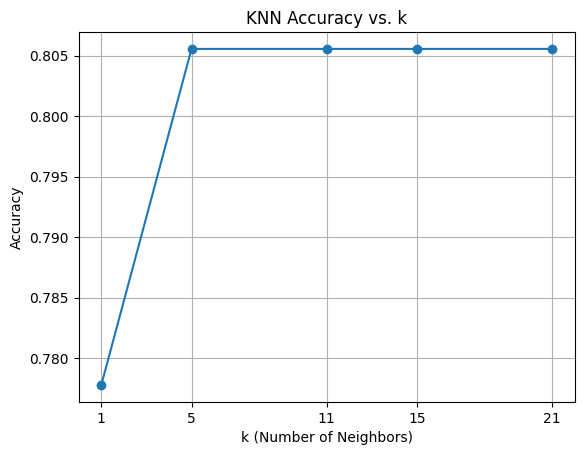

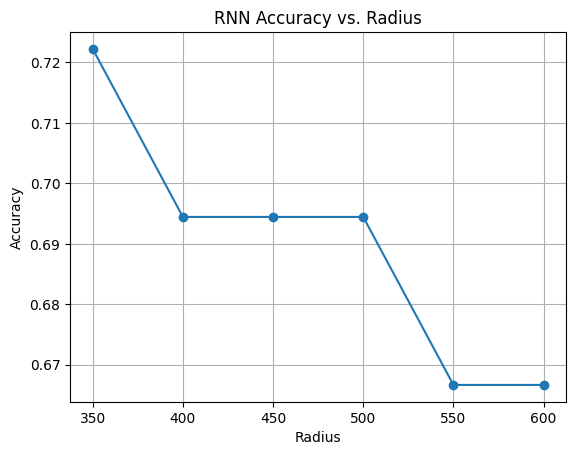

### Summary of Accuracies

,k_values,knn_accuracy,radius_values,rnn_accuracy
0,1.0,0.777778,350,0.722222
1,5.0,0.805556,400,0.694444
2,11.0,0.805556,450,0.694444
3,15.0,0.805556,500,0.694444
4,21.0,0.805556,550,0.666667
5,NaN,NaN,600,0.666667


In [5]:
# Step 4: Visualize and Compare Results
display(Markdown("## Step 4: Visualization"))

plt.figure()
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('KNN Accuracy vs. k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

plt.figure()
plt.plot(radius_values, rnn_accuracies, marker='o')
plt.title('RNN Accuracy vs. Radius')
plt.xlabel('Radius')
plt.ylabel('Accuracy')
plt.xticks(radius_values)
plt.grid(True)
plt.show()

# Summary DataFrame
summary = pd.DataFrame({
    'k_values': k_values + [None]*(len(radius_values)-len(k_values)),
    'knn_accuracy': knn_accuracies + [None]*(len(radius_values)-len(knn_accuracies)),
    'radius_values': radius_values,
    'rnn_accuracy': rnn_accuracies
})
display(Markdown("### Summary of Accuracies"))
display(summary)
